In [1]:
from bs4 import BeautifulSoup as BS
import urllib.request as req
import urllib.parse as pa
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# 화면에 그래프 그리기
%matplotlib inline
# Korean Setting , Minus 표시
mpl.rcParams['axes.unicode_minus'] = False
# family = 폰트 이름 size = 사이즈 크기
mpl.rc('font', family='D2Coding', size=25)
# Graph 크기 변경
plt.rcParams["figure.figsize"]= (15,9)

In [2]:
# 평점 url 얻기 위한 url_open

def url_point_Open(movie_num):
    url = 'https://movie.naver.com/movie/bi/mi/point.nhn?code='+str(movie_num)
    url_open = req.urlopen(url)
    
    return url_open

In [3]:
def url_Open(sub_url, page_num):
    url = 'https://movie.naver.com' + sub_url +'&page='+ str(page_num)
    url_open = req.urlopen(url)
    
    return url_open

In [4]:
movie_num = 193804
soup = BS(url_point_Open(movie_num), 'html.parser')
ifr_url = soup.find('iframe')['src']
ifr_url

'/movie/bi/mi/pointWriteFormList.nhn?code=193804&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false'

In [5]:
soup = BS(url_Open(ifr_url, 11), 'html.parser')

In [6]:
count = soup.find('strong', 'total').find('em')
count

<em>676</em>

In [7]:
count = int(count.string.replace(',', ''))

In [8]:
count

676

In [9]:
loop_count = math.ceil(count/10)
loop_count

68

In [15]:
point = []
review = []
date = []

In [16]:
page_num = 1

while page_num  < loop_count+1:
    soup = BS(url_Open(ifr_url, page_num), 'html.parser')
    result = soup.find(class_='score_result')
    lis = result.find_all('li')
    print(page_num, end=' ')
    
    for lst in lis:
        count_span = len(lst.find(class_='score_reple').find_all('span'))
        count_icon = len(lst.find_all(class_='ico_viewer'))
        count_spo = len(lst.find_all(class_='text_spo'))
        point.append(int(lst.find(class_='star_score').find('em').get_text()))
#         print(count_span, count_icon, count_spo)
        
        if count_icon ==1 and count_spo == 1:
            r = lst.find_all('span')[4].get_text().strip()
        elif count_icon == 1:
            r = lst.find(class_='score_reple').find('p').get_text().strip().replace('\n', '').replace('\r', '').replace('\t', '').replace('관람객', '')
        elif count_spo == 1:
            r = lst.find_all('span')[3].get_text().strip()
        elif count_span == 3:
            try:
                r = lst.find_all('a')[0]['data-src']
            except:
                r = lst.find(class_='score_reple').find('p').get_text().strip()
        elif count_span == 2:
            r = lst.find(class_='score_reple').find('p').get_text().strip()
            
        review.append(r)
        date.append(lst.find(class_='score_reple').find_all('em')[1].get_text())
            
    page_num += 1


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 

In [17]:
df = pd.DataFrame(dict(zip(['날짜','리뷰', '평점'], [date, review, point])))
df

,날짜,리뷰,평점
0,2020.05.06 20:13,이것은... 사진 세울 때 쓰는 겁니다ㅎ,10
1,2020.05.09 23:25,나라면 그냥 12년 살았을듯....쫄려 죽는줄..,10
2,2020.05.06 11:02,영화 재밌습니다. 다니엘 래드클리프 완전 열연이네요. 열쇠맞출때마다 몰입감과 긴장감...,10
3,2020.05.06 14:47,심장 쫄리는 수준이 장난 아님. 말도 안 되는 것 같은데 실화라니 더 충격,10
4,2020.05.06 14:45,다니엘 래드클리프.. 이제는 배우로 도약하는거같다,10
...,...,...,...
671,2020.05.14 21:21,그냥 할 말이 딱 세 글자 뿐이다. 핵! 노! 잼!,1
672,2020.05.12 21:20,"카라멜팝콘 먹으면서 보다가 갑자기 스크린에서 똥찬 변기통을 클로즈업, 그것도 몇초간...",1
673,2020.05.27 21:13,지루하다. 별내용 없어요.그냥 나무열쇠로 탈출하다 맨마지막방은 안열려서 드라이버로 ...,1
674,2020.05.06 10:12,감옥에 갇히고 열쇠를 몰래 제작하는 중반부 까지는 몰입도가 최강이었다. 하지만 20...,5


In [13]:
df.to_csv('movie_Escape_From_Pretoria.csv', encoding='utf-8')

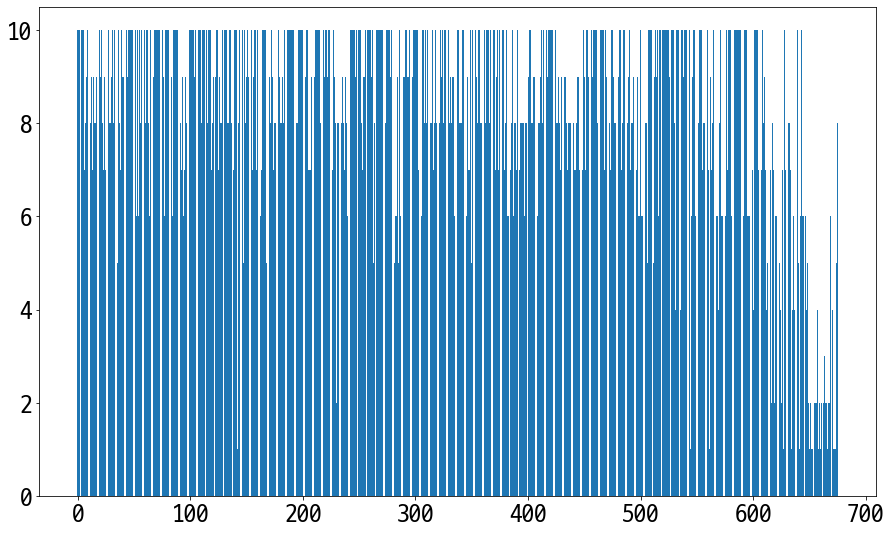

In [25]:
plt.bar(df.index, df['평점'])
plt.show()